In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
from credentials import client_id, client_secret
import re
import numpy as np

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

# Input Playlist URL Below

In [3]:
playlist_url = input('Copy Playlist URL from Spotify and Enter Here: ')

Copy Playlist URL from Spotify and Enter Here: https://open.spotify.com/playlist/19D4gHi9J3oF1GDSFSNLoT?si=250bf73502b14ea8


In [4]:
playlist_id = re.findall('\/(\w*)\?si',playlist_url)
spotify_playlist = sp.playlist(playlist_id[0])

In [5]:
playlist = {
    'Track':[],
    'Artist':[],
    'ID':[],
    'danceability':[],
    'energy':[],
    'speechiness':[],
    'acousticness':[],
    'instrumentalness':[],
    'liveness':[],
    'valence':[],
    'loudness':[]
}
plist_name = spotify_playlist['name']

for i in spotify_playlist['tracks']['items']:
    track = i['track']['name']
    art = i['track']['album']['artists'][0]['name']
    id_ = i['track']['id']
    
    feat = sp.audio_features(id_)
    
    playlist['Track'].append(track)
    playlist['Artist'].append(art)
    playlist['ID'].append(id_)
    playlist['danceability'].append(feat[0]['danceability'])
    playlist['energy'].append(feat[0]['energy'])
    playlist['speechiness'].append(feat[0]['speechiness'])
    playlist['acousticness'].append(feat[0]['acousticness'])
    playlist['instrumentalness'].append(feat[0]['instrumentalness'])
    playlist['liveness'].append(feat[0]['liveness'])
    playlist['valence'].append(feat[0]['valence'])
    playlist['loudness'].append(feat[0]['loudness'])

In [6]:
playlist_df = pd.DataFrame(playlist)
playlist_df.head()

,Track,Artist,ID,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness
0,The Other Shoe,Fucked Up,1RMfsWLPWzMeNuNt2Dkgpy,0.414,0.946,0.0783,0.04510,0.000137,0.1090,0.1510,-3.822
1,If It Kills Me,Algernon Cadwallader,6lA7e4tVIc0N730lOprPur,0.225,0.934,0.0955,0.00001,0.012300,0.0456,0.5910,-5.366
2,False Jesii Part 2,Pissed Jeans,6P47fl2x9lKFMbgVG5JFDl,0.193,0.982,0.1610,0.00431,0.122000,0.3530,0.1510,-4.039
3,Run Away With Me,Carly Rae Jepsen,5e0vgBWfwToyphURwynSXa,0.564,0.719,0.0475,0.01260,0.000177,0.0536,0.2510,-5.505
4,Contact,Wicca Phase Springs Eternal,13vcqgMWOlvvMkCkGEsQ5a,0.676,0.603,0.0413,0.03250,0.001660,0.0920,0.0996,-7.140


In [7]:
playlist_df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.442058,0.811500,0.082938,0.091929,0.130704,0.218387,0.424877,-5.647686
std,0.185191,0.191082,0.069789,0.205471,0.246918,0.161235,0.233051,2.598168
min,0.122000,0.156000,0.026100,0.000004,0.000000,0.045600,0.035900,-15.971000
25%,0.294000,0.726000,0.036575,0.000165,0.000077,0.095800,0.251250,-6.302750
50%,0.424500,0.900000,0.056650,0.003915,0.001915,0.148000,0.402000,-5.147000
75%,0.551000,0.959000,0.097875,0.061650,0.117750,0.317750,0.592500,-3.993500
max,0.850000,0.997000,0.423000,0.982000,0.953000,0.750000,0.933000,-1.795000


In [8]:
playlist_avgs = {}
for i in playlist_df.columns[3:]:
    playlist_avgs[i] = playlist_df[i].mean()

In [9]:
playlist_avgs

{'danceability': 0.44205813953488376,
 'energy': 0.8115000000000002,
 'speechiness': 0.08293837209302324,
 'acousticness': 0.0919287684883721,
 'instrumentalness': 0.13070439348837207,
 'liveness': 0.21838720930232552,
 'valence': 0.42487674418604643,
 'loudness': -5.6476860465116285}

# Importing Avg Features to Compare Against

In [10]:
avg_features = pd.read_csv("Average_Features/All_AvgFeatures_1990_Today.csv")
avg_features.head()

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06
1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13
2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20
3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27
4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03


# Filter Billboard Top 100 DataFrame to Compare Your Playlist
Modify the *earliest_date* and *latest_date* as you see fit<br>
YYYY-MM-DD

In [11]:
earliest_date = '2016-01-01'
latest_date = '2021-05-02'

filtered_features = avg_features[(avg_features['week'] >= earliest_date) &
                                (avg_features['week'] <= latest_date)]
filtered_features.head()

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
1355,0.65254,0.66431,-5.84336,0.105032,0.169031,0.001439,0.181733,0.476352,124.72825,2016-01-02
1356,0.65835,0.65385,-6.20947,0.106374,0.169312,0.002089,0.180640,0.475688,125.97062,2016-01-09
1357,0.66505,0.67399,-5.94260,0.110644,0.150813,0.001441,0.185341,0.476382,126.29639,2016-01-16
1358,0.65946,0.68683,-5.88138,0.108788,0.145032,0.002165,0.186477,0.481932,123.31219,2016-01-23
1359,0.65402,0.68901,-5.98553,0.105771,0.149447,0.004187,0.180361,0.478262,123.36336,2016-01-30


In [12]:
billboard_avgs = {}
for i in filtered_features.columns:
    if i == 'tempo_avg' or i == 'week':
        pass
    else:
        billboard_avgs[i.replace('_avg','')] = filtered_features[i].mean()
billboard_avgs

{'danceability': 0.6807177079034069,
 'energy': 0.6338358765070056,
 'loudness': -6.2405258386734745,
 'speechiness': 0.12264690134318089,
 'acousticness': 0.19414694065066432,
 'instrumentalness': 0.007131712373404259,
 'liveness': 0.164559765033851,
 'valence': 0.4846158392889468}

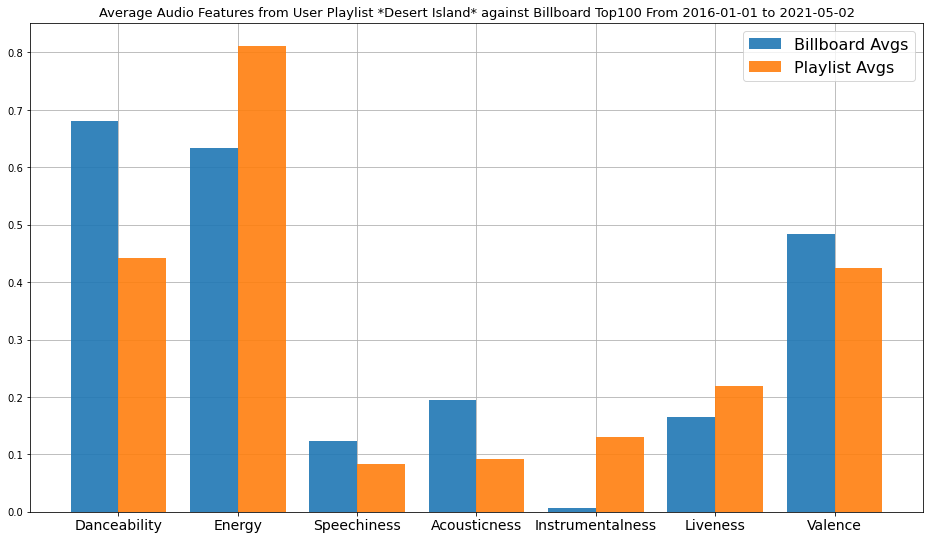

In [13]:
plt.figure(figsize=(16,9))

bill_x_vals = [i.capitalize() for i in billboard_avgs.keys() if i != 'loudness']
bill_y_vals = [v for k,v in billboard_avgs.items() if k != 'loudness']

user_y_vals = [v for k,v in playlist_avgs.items() if k != 'loudness']

x = np.arange(len(bill_x_vals))
width = 0.4
plt.bar(x - width/2, bill_y_vals, width, alpha=0.9, label="Billboard Avgs", zorder=3.5)
plt.bar(x + width/2, user_y_vals, width, alpha=0.9, label="Playlist Avgs", zorder=3.5)

plt.title(f'Average Audio Features from User Playlist *{plist_name}* against Billboard Top100 From {earliest_date} to {latest_date}', fontsize=13)
plt.xticks(x, bill_x_vals, fontsize=14)
plt.grid(zorder=5.5)
plt.legend(fontsize=16)
plt.show()

In [14]:
def make_colors(y_values):
    
    out = []
    for i in y_values:
        if i >= 0.15:
            out.append('#08FC00')
        elif i >= 0.1:
            out.append('#7AFC00')
        elif i >= 0.5:
            out.append('#BBFC00')
        elif i >= 0.000000001:
            out.append("#BFFC00")
        elif i>= -0.05:
            out.append('#d9ff00')
        elif i >= -0.1:
            out.append('#FCF500')
        elif i >= -0.15:
            out.append('#FCB800')
        elif i < -0.15:
            out.append('#FC0000')
    return out

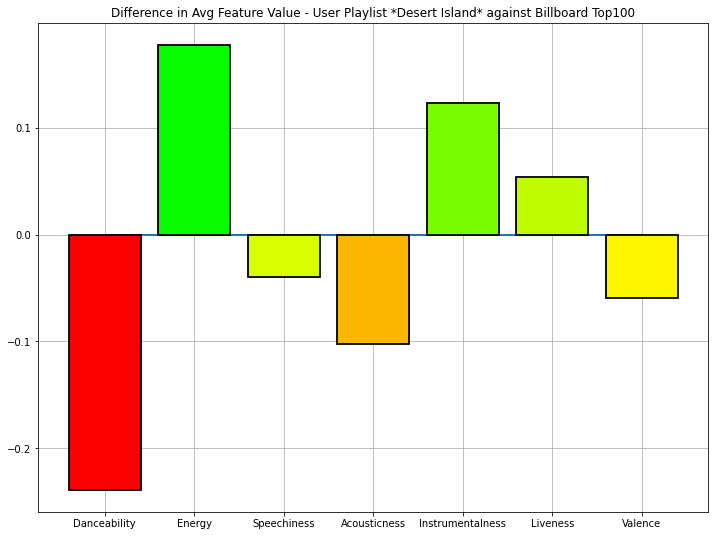

In [15]:
plt.figure(figsize=(12,9))

billboard_vals = [float(v) for k,v in billboard_avgs.items() if k != 'loudness']
playlist_vals = [float(v) for k,v in playlist_avgs.items() if k != 'loudness']

y_vals = [i[1]-i[0] for i in zip(billboard_vals, playlist_vals)]

colors = make_colors(y_vals)

plt.bar(bill_x_vals, y_vals, color=colors, edgecolor='black', linewidth=1.8, zorder=3.5)
plt.hlines(0, xmin=bill_x_vals[0], xmax=bill_x_vals[-1], linewidth=2)
plt.title(f'Difference in Avg Feature Value - User Playlist *{plist_name}* against Billboard Top100')
plt.grid(zorder=5.5)
plt.show()